lets start the project Keep going

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('yield_df.csv')

In [3]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


we need to delete unnecassary cloumn

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [6]:
df.shape

(28242, 7)

checking for null values

In [7]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [9]:
df.duplicated().sum()

2310

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [13]:
# transforming the  avg_rain_fall col
df['average_rain_fall_mm_per_year']


0        1485.0
1        1485.0
2        1485.0
3        1485.0
4        1485.0
          ...  
28237     657.0
28238     657.0
28239     657.0
28240     657.0
28241     657.0
Name: average_rain_fall_mm_per_year, Length: 25932, dtype: float64

Below is used to drop the row which has  strings like "N/A" and retain the float values in the avg_rain_fall_mm_per_year

In [14]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True

In [15]:
to_drop=df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [16]:
to_drop

Index([], dtype='int64')

In [17]:
df.drop(to_drop)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [18]:
df['average_rain_fall_mm_per_year']=df['average_rain_fall_mm_per_year'].astype(np.float64) # to make this column to become float type as datatype

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25932 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           25932 non-null  object 
 1   Item                           25932 non-null  object 
 2   Year                           25932 non-null  int64  
 3   hg/ha_yield                    25932 non-null  int64  
 4   average_rain_fall_mm_per_year  25932 non-null  float64
 5   pesticides_tonnes              25932 non-null  float64
 6   avg_temp                       25932 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.6+ MB


Graph freuency versus area

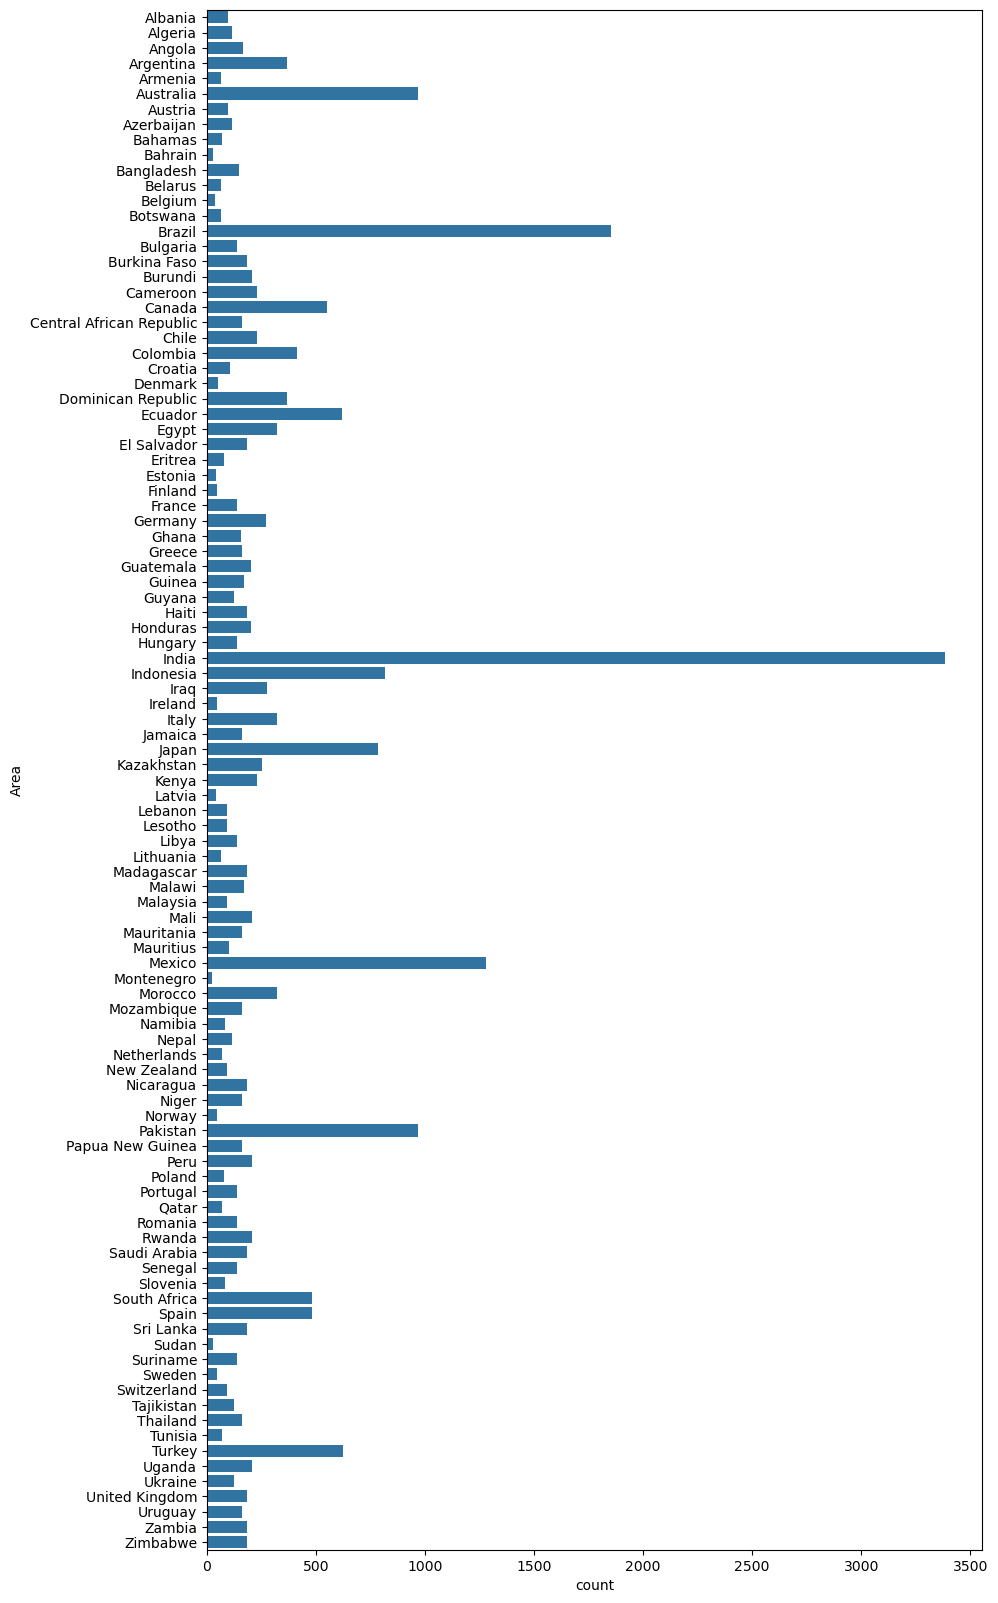

In [20]:
plt.figure(figsize=(10,20)) #hieght and width
sns.countplot(y=df['Area'])
plt.show()


Yield_per_country

In [21]:
df['Area'].head

<bound method NDFrame.head of 0         Albania
1         Albania
2         Albania
3         Albania
4         Albania
           ...   
28237    Zimbabwe
28238    Zimbabwe
28239    Zimbabwe
28240    Zimbabwe
28241    Zimbabwe
Name: Area, Length: 25932, dtype: object>

In [22]:
country=len(df['Area'].unique())
print(country)

101


In [23]:
country=(df['Area'].unique())
country # country is an array now


array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Pola

In [24]:
for state in country:
    print(state)

Albania
Algeria
Angola
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Belarus
Belgium
Botswana
Brazil
Bulgaria
Burkina Faso
Burundi
Cameroon
Canada
Central African Republic
Chile
Colombia
Croatia
Denmark
Dominican Republic
Ecuador
Egypt
El Salvador
Eritrea
Estonia
Finland
France
Germany
Ghana
Greece
Guatemala
Guinea
Guyana
Haiti
Honduras
Hungary
India
Indonesia
Iraq
Ireland
Italy
Jamaica
Japan
Kazakhstan
Kenya
Latvia
Lebanon
Lesotho
Libya
Lithuania
Madagascar
Malawi
Malaysia
Mali
Mauritania
Mauritius
Mexico
Montenegro
Morocco
Mozambique
Namibia
Nepal
Netherlands
New Zealand
Nicaragua
Niger
Norway
Pakistan
Papua New Guinea
Peru
Poland
Portugal
Qatar
Romania
Rwanda
Saudi Arabia
Senegal
Slovenia
South Africa
Spain
Sri Lanka
Sudan
Suriname
Sweden
Switzerland
Tajikistan
Thailand
Tunisia
Turkey
Uganda
Ukraine
United Kingdom
Uruguay
Zambia
Zimbabwe


In [25]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [26]:
# below function is doing sum of the total yield in a country include different item(ex: Miaze,potatoes,Rice,Paddy)
# yeild per country
# df[df['Area'] == state]: Filters the DataFrame df to include only rows corresponding to the current state.
# ['hg/ha_yield'].sum(): Calculates the sum of the hg/ha_yield column for the filtered rows, which represents the yield for that state.
yeild_per_country=[]
for state in country:
    yeild_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())

In [27]:
yeild_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

Yeild_per_country Graph

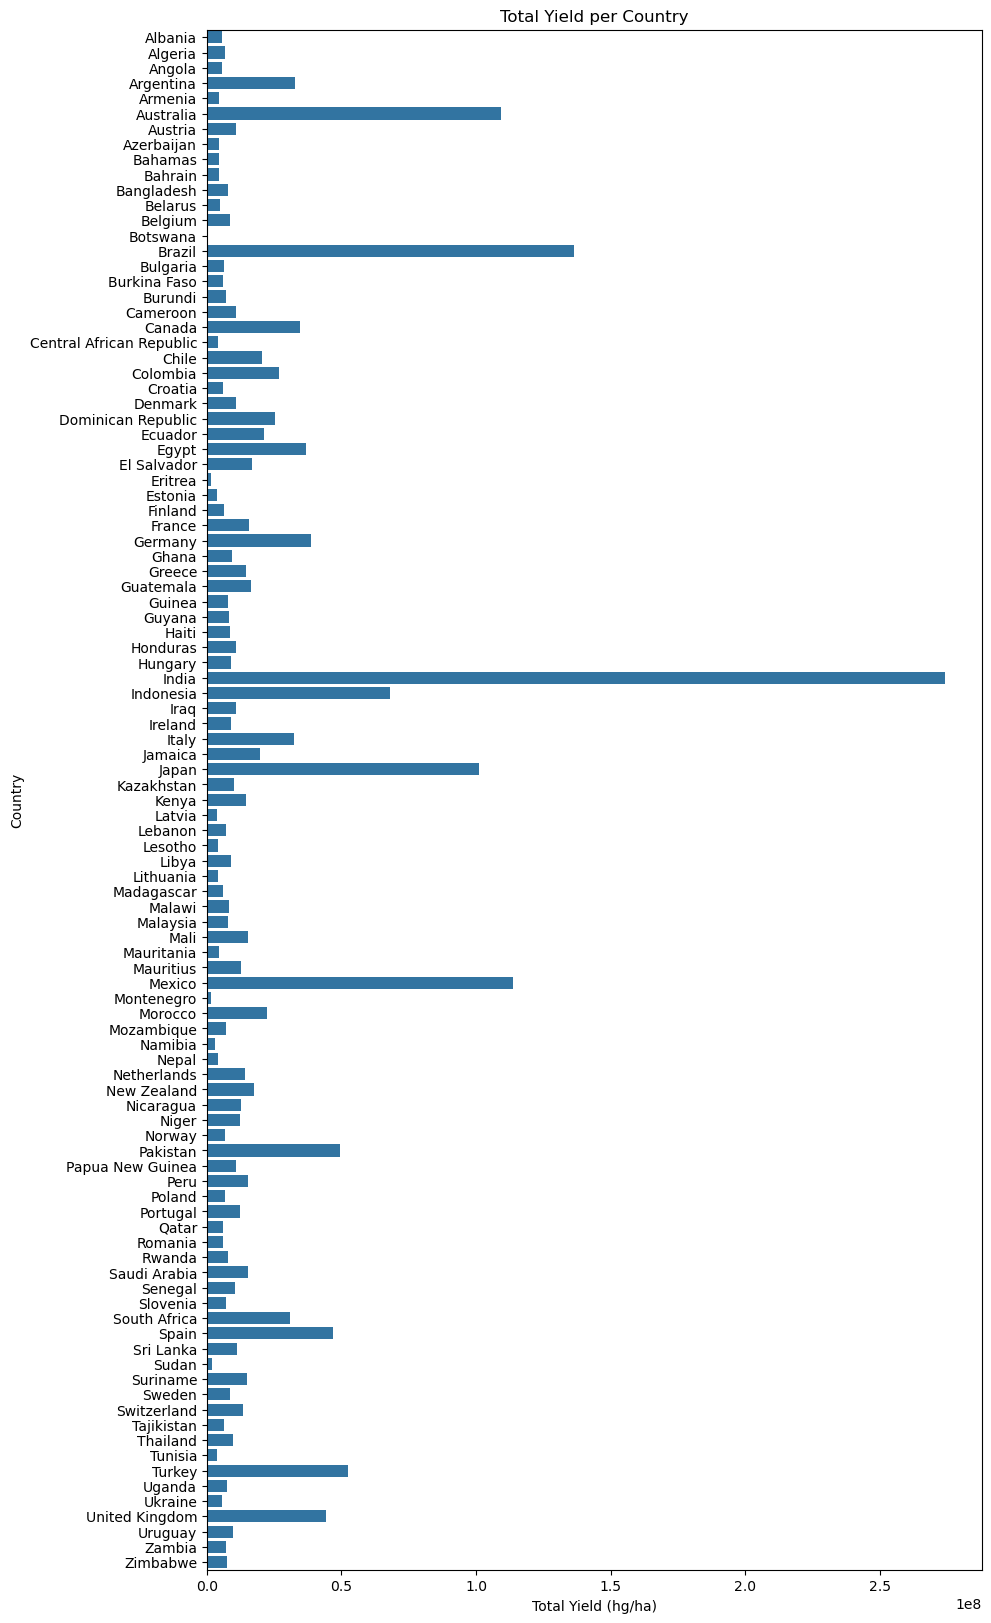

In [28]:
plt.figure(figsize=(10, 20))
sns.barplot(y=country, x=yeild_per_country, orient='h')  # 'orient="h"' ensures a horizontal bar plot
plt.xlabel('Total Yield (hg/ha)')
plt.ylabel('Country')
plt.title('Total Yield per Country')
plt.show()

In [29]:
df['Item'].value_counts()

Item
Potatoes                3956
Maize                   3824
Wheat                   3539
Rice, paddy             3091
Soybeans                2940
Sorghum                 2770
Sweet potatoes          2593
Cassava                 1889
Yams                     774
Plantains and others     556
Name: count, dtype: int64

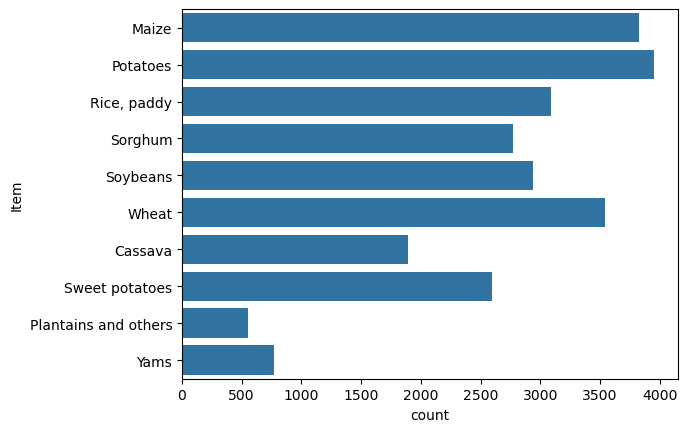

In [30]:
# visuliaze
sns.countplot(y=df['Item'])
plt.show()

Yield Vs Item

In [31]:
crops=df['Item'].unique()

In [32]:
yeild_per_Item=[]
for crop in crops:
    yeild_per_Item.append(df[df['Item']==crop]['hg/ha_yield'].sum())


In [33]:
yeild_per_Item

[142020761,
 785921609,
 127646024,
 52906376,
 49957039,
 106614786,
 275132269,
 310269345,
 58958974,
 86769760]

<Axes: >

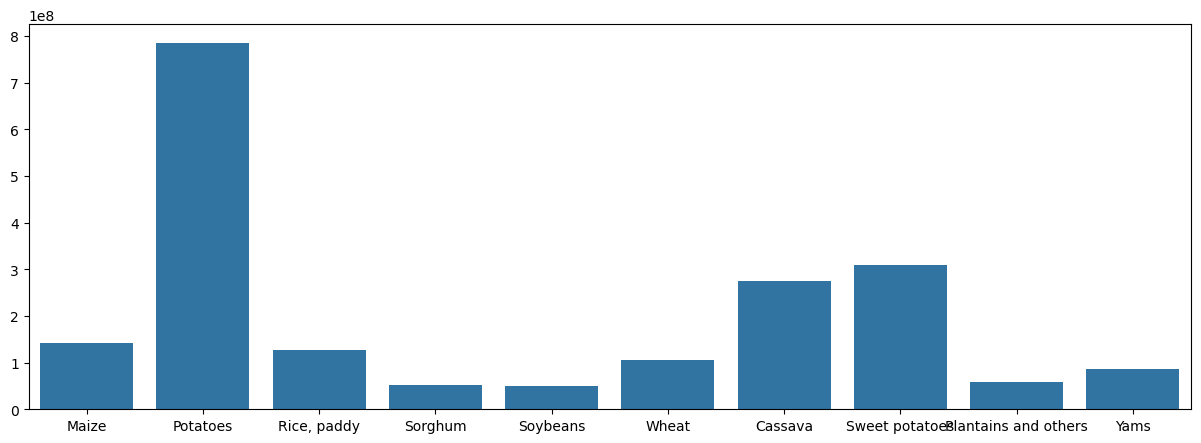

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(x=crops,y=yeild_per_Item)

In [35]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [36]:
# Move 'hg/ha_yield' to the last position
columns = [col for col in df.columns if col != 'hg/ha_yield']  # Get all columns except 'hg/ha_yield'
columns.append('hg/ha_yield')  # Add 'hg/ha_yield' to the end
df = df[columns]  # Reorder columns

In [37]:
df.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1990,1485.0,121.0,16.37,36613
1,Albania,Potatoes,1990,1485.0,121.0,16.37,66667
2,Albania,"Rice, paddy",1990,1485.0,121.0,16.37,23333
3,Albania,Sorghum,1990,1485.0,121.0,16.37,12500
4,Albania,Soybeans,1990,1485.0,121.0,16.37,7000


In [38]:
# axis=0: Operates on rows .
# axis=1: Operates on columns.
X=df.drop(columns='hg/ha_yield',axis=1)
y=df['hg/ha_yield']

In [39]:
X.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,1485.0,121.0,16.37
1,Albania,Potatoes,1990,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,1485.0,121.0,16.37
3,Albania,Sorghum,1990,1485.0,121.0,16.37
4,Albania,Soybeans,1990,1485.0,121.0,16.37


In [40]:
y.head()

0    36613
1    66667
2    23333
3    12500
4     7000
Name: hg/ha_yield, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train.shape

(20745, 6)

In [43]:
y_train.shape

(20745,)

In [44]:
y_test.shape

(5187,)

COnverting categorical values to numerical and scaling the values

In [45]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer # it is tool that allows you to apply different preprocessing or transformation steps to specific columns in a dataset

In [46]:
ohe=OneHotEncoder(drop='first')
# it drops the first category of each feature to avoid the "dummy variable trap," where one feature is highly correlated with others.
scaler=StandardScaler()

In [47]:
df.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1990,1485.0,121.0,16.37,36613
1,Albania,Potatoes,1990,1485.0,121.0,16.37,66667
2,Albania,"Rice, paddy",1990,1485.0,121.0,16.37,23333
3,Albania,Sorghum,1990,1485.0,121.0,16.37,12500
4,Albania,Soybeans,1990,1485.0,121.0,16.37,7000


In [48]:
preprocessor=ColumnTransformer(
    transformers=[
        ('onehotencoder',ohe,[0, 1]), # 4 and 5 is the index for which we need to apply the onehotccoding
        ('standardization',scaler,[2, 3, 4, 5]) 
    ],
    remainder='passthrough' # we are telling that do not toucch 6 coulumn in that just pass through without touching this
)


In [49]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(drop='first'),
                                 [0, 1]),
                                ('standardization', StandardScaler(),
                                 [2, 3, 4, 5])])

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20745 entries, 24234 to 25918
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           20745 non-null  object 
 1   Item                           20745 non-null  object 
 2   Year                           20745 non-null  int64  
 3   average_rain_fall_mm_per_year  20745 non-null  float64
 4   pesticides_tonnes              20745 non-null  float64
 5   avg_temp                       20745 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.1+ MB


In [51]:
X_train_dummy=preprocessor.fit_transform(X_train)
X_test_dummy=preprocessor.transform(X_test)

In [52]:
print(X_train_dummy.shape)  # Check the dimensions


(20745, 113)


In [53]:
X_train_dummy

<20745x113 sparse matrix of type '<class 'numpy.float64'>'
	with 122877 stored elements in Compressed Sparse Row format>

TRAINING MODELS

In [54]:
from sklearn.linear_model import LinearRegression,    Lasso,Ridge
from sklearn.neighbors  import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [55]:
models={
    'lr':LinearRegression(),
    'lss':Lasso(),
    'rg':Ridge(),
    'dtr':DecisionTreeRegressor(),
    'knr':KNeighborsRegressor()
}
for name,mod in models.items():
    mod.fit(X_train_dummy,y_train)
    y_pred=mod.predict(X_test_dummy)

    print(f"{name} MSE :{mean_squared_error(y_pred,y_test)} score:{r2_score(y_pred,y_test)} ")

lr MSE :1821709948.6528149 score:0.6630517798110298 


c:\Users\shara\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43166910886.82422, tolerance: 14819338848.544123
  model = cd_fast.sparse_enet_coordinate_descent(


lss MSE :1822234158.2996287 score:0.6624882807604534 
rg MSE :1822540692.0736194 score:0.6612897794780608 
dtr MSE :167602283.7466744 score:0.9768684347687282 
knr MSE :127461418.18759204 score:0.981843107169836 


SELECTTING the model

In [56]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([154330.,  15838.,  72614., ...,  52692.,   9621., 132600.])

In [57]:
df.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1990,1485.0,121.0,16.37,36613
1,Albania,Potatoes,1990,1485.0,121.0,16.37,66667
2,Albania,"Rice, paddy",1990,1485.0,121.0,16.37,23333
3,Albania,Sorghum,1990,1485.0,121.0,16.37,12500
4,Albania,Soybeans,1990,1485.0,121.0,16.37,7000


In [58]:
def prediction(Area	,Item, Year	,average_rain_fall_mm_per_year	,pesticides_tonnes	,avg_temp):
    features=np.array([[Area,Item	,Year	,average_rain_fall_mm_per_year	,pesticides_tonnes	,avg_temp]])
    transformed_features =preprocessor.transform(features)
    predicted_value=dtr.predict(transformed_features).reshape(1,-1) #reshape (1 row, many columns).
    return predicted_value


In [59]:
Area	= 'Albania'
Item	='Maize'
Year	= 1990
average_rain_fall_mm_per_year=1485.0
pesticides_tonnes	=121.0
avg_temp	=16.37


result=prediction(Area,Item,Year,average_rain_fall_mm_per_year	,pesticides_tonnes,avg_temp	)

c:\Users\shara\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\shara\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [63]:
df.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1990,1485.0,121.0,16.37,36613
1,Albania,Potatoes,1990,1485.0,121.0,16.37,66667
2,Albania,"Rice, paddy",1990,1485.0,121.0,16.37,23333
3,Albania,Sorghum,1990,1485.0,121.0,16.37,12500
4,Albania,Soybeans,1990,1485.0,121.0,16.37,7000


In [60]:
print(int(result[0,0]))

36613


In [61]:
import pickle  #used to store in a file it will convert python object into byte data(serilization)
with open('dtr.pkl' ,'wb') as file:
    pickle.dump(dtr,file)

with open('preprocessor.pkl','wb') as file:
    pickle.dump(preprocessor,file)


In [62]:
import sklearn
print(sklearn.__version__)


1.5.1


In [68]:
X_train.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
24234,Saudi Arabia,Sorghum,2000,59.0,3024.11,26.55
9468,Greece,Sweet potatoes,2012,652.0,8002.20,18.82
6793,Colombia,Maize,2006,3240.0,98328.63,27.51
28212,Zimbabwe,Potatoes,2010,657.0,3305.17,21.17
7358,Dominican Republic,Sweet potatoes,2007,1410.0,5689.80,27.08


In [69]:
df


,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1990,1485.0,121.00,16.37,36613
1,Albania,Potatoes,1990,1485.0,121.00,16.37,66667
2,Albania,"Rice, paddy",1990,1485.0,121.00,16.37,23333
3,Albania,Sorghum,1990,1485.0,121.00,16.37,12500
4,Albania,Soybeans,1990,1485.0,121.00,16.37,7000
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,657.0,2550.07,19.76,22581
28238,Zimbabwe,Sorghum,2013,657.0,2550.07,19.76,3066
28239,Zimbabwe,Soybeans,2013,657.0,2550.07,19.76,13142
28240,Zimbabwe,Sweet potatoes,2013,657.0,2550.07,19.76,22222
